In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("datasets/diabetes.csv")
outcome=df["Outcome"]
df=((df-df.mean())/(df.max()-df.min()))
df["Outcome"]=outcome
df_train=df.sample(frac=0.8,random_state=0)
df_test=df.drop(df_train.index)
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunction,Age,Outcome
661,-0.167356,0.392490,0.056513,0.226904,-0.094326,0.162555,0.393733,-0.187348,1
122,-0.108532,-0.069822,0.040119,0.095591,0.023878,0.023956,-0.028982,-0.170681,0
113,0.009115,-0.225601,-0.058242,-0.207439,-0.094326,0.029917,-0.034533,-0.137348,0
14,0.067938,0.226661,0.023726,-0.015520,0.112530,-0.092289,0.049156,0.295985,1
529,-0.226180,-0.049721,-0.033651,-0.207439,-0.094326,-0.110173,0.080326,-0.037348,0
...,...,...,...,...,...,...,...,...,...
25,0.362056,0.020630,0.007332,0.055187,0.041608,-0.013302,-0.113952,0.129319,1
110,-0.049709,0.251786,0.023726,0.125894,0.065249,0.019485,-0.116514,-0.154015,1
149,-0.108532,-0.155249,0.007332,-0.035722,-0.094326,-0.069934,-0.165191,-0.187348,0
152,0.303232,0.176409,0.138480,0.075389,0.088890,0.034388,0.306201,0.145985,1


In [3]:
X, y = df.drop("Outcome", axis=1), df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()
X_train, X_test = np.c_[np.ones((len(X_train), 1)), X_train], np.c_[np.ones((len(X_test), 1)), X_test]
y_train.shape = (y_train.size, 1)
y_test.shape = (y_test.size, 1)

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def h(theta,X):
    zs=X.dot(theta)
    return sigmoid(zs)

def cost(theta,X,y):
    hs=h(theta,X)
    cost=sum(-y*np.log(hs)-(1-y)*np.log(1-hs))/X.size
    return cost

def gradient(theta,X,y):
    return X.T.dot(h(theta,X)-y)/X.size

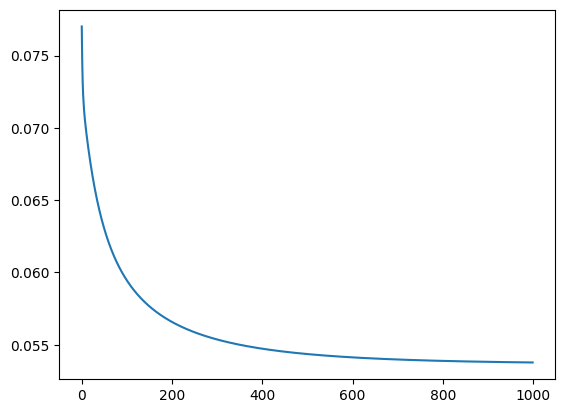

In [5]:
k=len(df.columns)
theta=np.zeros((k,1))
alpha=10
iterations=1000
costs=[]
for i in range(iterations):
    costs.append(cost(theta,X_train,y_train))
    theta=theta-alpha*gradient(theta,X_train,y_train)
plt.plot(range(iterations),costs)

In [8]:
X_test,y_test

(array([[ 1.        , -0.167356  ,  0.39248979, ...,  0.16255472,
          0.39373343, -0.18734809],
        [ 1.        , -0.10853248, -0.06982177, ...,  0.02395562,
         -0.0289822 , -0.17068142],
        [ 1.        ,  0.00911458, -0.22560066, ...,  0.02991687,
         -0.03453301, -0.13734809],
        ...,
        [ 1.        ,  0.00911458,  0.10605763, ...,  0.17894817,
          0.07392131, -0.18734809],
        [ 1.        , -0.04970895, -0.02459563, ..., -0.08483723,
         -0.15579688, -0.15401476],
        [ 1.        , -0.167356  , -0.06982177, ..., -0.01777315,
          0.14907075, -0.15401476]]),
 array([[1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [

In [10]:
def test(theta,X_test,y_test):
    hs=h(theta,X_test)
    print("Accuracy:",sum((hs>=0.5)==y_test)/len(y_test))

test(theta,X_test,y_test)

Accuracy: [0.81818182]
